In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("merged_final.csv")

C:\Users\catym\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6,13,29,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data2=data[['title','rating','user_id']]
data3=data2.groupby('title')[['rating','user_id']].agg('count')
mask=data3['rating']>=10
data4=data3[mask]
merged_inner=pd.merge(left=data4,right=data2,left_on='title',right_on='title',how='inner')
Final=merged_inner[['title','rating_y','user_id_y']]

In [3]:
%pylab inline
import seaborn as sns 

Populating the interactive namespace from numpy and matplotlib


[Text(0, 0, 'The Little Prince'),
 Text(0, 0, 'Anne of Green Gables, #1'),
 Text(0, 0, 'Watchmen'),
 Text(0, 0, 'The Hunger Games, #3'),
 Text(0, 0, 'Wuthering Heights'),
 Text(0, 0, 'Howl and Other Poems'),
 Text(0, 0, 'Jane Eyre'),
 Text(0, 0, 'Persepolis, #1'),
 Text(0, 0, 'Pride and Prejudice'),
 Text(0, 0, 'Maus, #1')]

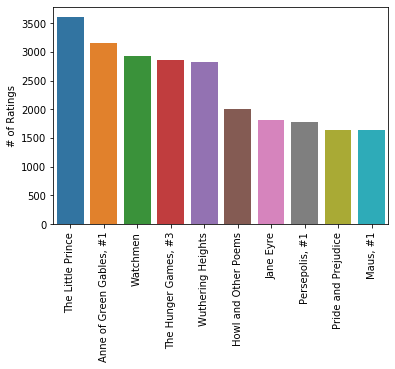

In [4]:
sr_num_rating = data2.groupby(['title'])['rating'].count().sort_values(ascending = False)[:10]
df_num_rating = pd.DataFrame(sr_num_rating).reset_index()
df_num_rating
df_num_rating.loc[1, 'title'] = 'Anne of Green Gables, #1'
df_num_rating 
df_num_rating.loc[3, 'title'] = 'The Hunger Games, #3'
df_num_rating.loc[7, 'title'] = 'Persepolis, #1'
df_num_rating.loc[9, 'title'] = 'Maus, #1'
df_num_rating 
num_rating_plot = sns.barplot(x="title", y="rating", data=df_num_rating)
num_rating_plot.set(xlabel = '',ylabel= '# of Ratings')
num_rating_plot.set_xticklabels(num_rating_plot.get_xticklabels(),rotation=90)

C:\Users\catym\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


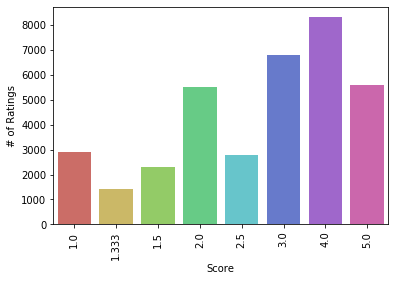

In [5]:
sr_score_rating = data2.groupby(['title'])['rating'].mean().sort_values(ascending = False)[:10]
df_score_rating = pd.DataFrame(sr_score_rating).reset_index()
score_rating_plot = sns.barplot(x="title", y="rating", palette='hls',data=df_score_rating)
score_rating_plot.set(xlabel = '',ylabel= 'Rating Scores')
score_rating_plot.set_xticklabels(score_rating_plot.get_xticklabels(),rotation=90)
s1=data2.groupby(['title'])['rating'].mean().sort_values(ascending = False)
s2 = s1.value_counts()
s3 = s2.iloc[1:9]
s3_df = pd.DataFrame(s3).reset_index()
s3_df['index'][7] = 1.333
s3_df
s3_df.rename(columns={"index": "Score", "rating": "# of Ratings"},inplace=True)
score_rating_plot = sns.barplot(x="Score", y="# of Ratings", palette='hls',data=s3_df)

1

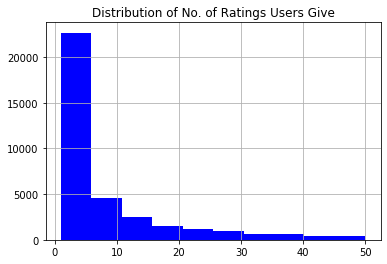

In [6]:
data2.groupby('user_id')['rating'].count().sort_values(ascending=False)
data2.groupby('user_id')['rating'].count().describe()
user_rating_count = data2.groupby('user_id')['rating'].count()
df_user_rating_count = pd.DataFrame(user_rating_count).reset_index()
df_user_rating_count.rename(columns={"rating": "Distribution of No. of Ratings Users Give"},inplace=True)
plt = df_user_rating_count.hist(range=[1,50], facecolor='Blue', align='mid')
data2.groupby('user_id')['rating'].count().describe()
data2.groupby('user_id')['rating'].count().mode()[0]

,is_ebook,No. of Ratings
0,non e-Books,0.860543
1,e-Books,0.139457


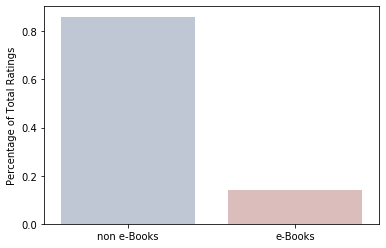

In [7]:
data.columns.values
ebook_rating = data[['is_ebook','rating']]
s_ebook_rating=ebook_rating.groupby('is_ebook')['rating'].count()
s_ebook_rating1=s_ebook_rating/(728899+118123)
s_ebook_rating1
df_ebook_rating = pd.DataFrame(s_ebook_rating1)
df_ebook_rating.reset_index(inplace=True)
df_ebook_rating
df_ebook_rating.loc[0, 'is_ebook'] = 'non e-Books'
df_ebook_rating.loc[1, 'is_ebook'] = 'e-Books'
df_ebook_rating
df_ebook_rating.rename(columns={"rating": "No. of Ratings"},inplace=True)
df_ebook_rating
ebook_rating_plot = sns.barplot(x='is_ebook',y='No. of Ratings', palette = 'vlag',data=df_ebook_rating)
ebook_rating_plot.set(xlabel = '',ylabel= 'Percentage of Total Ratings')
df_ebook_rating

,is_ebook,Mean Rating Score
0,non e-Books,3.957236
1,e-Books,3.933029


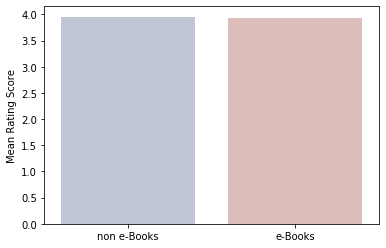

In [8]:
data.columns.values
ebook_rating = data[['is_ebook','rating']]
mask = ebook_rating['rating']!=0
ebook_rating_clean = ebook_rating[mask]
s_ebook_score=ebook_rating_clean.groupby('is_ebook')['rating'].mean()
df_ebook_score = pd.DataFrame(s_ebook_score)
df_ebook_score.reset_index(inplace=True)
df_ebook_score
df_ebook_score.loc[0, 'is_ebook'] = 'non e-Books'
df_ebook_score.loc[1, 'is_ebook'] = 'e-Books'
df_ebook_score
df_ebook_score.rename(columns={"rating": "Mean Rating Score"},inplace=True)
df_ebook_score
ebook_rating_plot = sns.barplot(x='is_ebook',y='Mean Rating Score', palette = 'vlag',data=df_ebook_score)
ebook_rating_plot.set(xlabel = '',ylabel= 'Mean Rating Score')
df_ebook_score


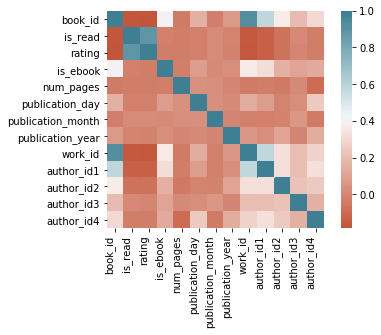

In [9]:
data_named = data.drop(columns = ['Unnamed: 0'])
corr = data_named.corr()
ax = sns.heatmap(
    corr, 
    #vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    #rotation=45,
    horizontalalignment='right'
);

In [12]:
data['popular_shelves'].unique()

array(["[{'count': '66', 'name': 'to-read'}, {'count': '6', 'name': 'children'}, {'count': '6', 'name': 'picture-books'}, {'count': '4', 'name': 'currently-reading'}, {'count': '3', 'name': 'childrens'}, {'count': '3', 'name': 'children-s-books'}, {'count': '1', 'name': 'books-for-my-class'}, {'count': '1', 'name': 'art-attack'}, {'count': '1', 'name': 'ajm-didntreadafterall'}, {'count': '1', 'name': 'puzzle'}, {'count': '1', 'name': 'favorite-kids-picture-books'}, {'count': '1', 'name': 'kinder'}, {'count': '1', 'name': 'a-book-read-15-to-19'}, {'count': '1', 'name': 'owned-books'}, {'count': '1', 'name': 'e'}, {'count': '1', 'name': 'graphic-novels'}, {'count': '1', 'name': 'review-written-but-not-posted'}, {'count': '1', 'name': 'read-in-2017'}, {'count': '1', 'name': 'kiddaloos'}, {'count': '1', 'name': 'roadtrip'}, {'count': '1', 'name': 'borrowed'}, {'count': '1', 'name': 'illustrated'}, {'count': '1', 'name': 'evan-and-elliot'}, {'count': '1', 'name': 'want'}, {'count': '1', 'na

In [18]:
data['similar_books'];

C:\Users\catym\Anaconda3\lib\site-packages\pandas\core\generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


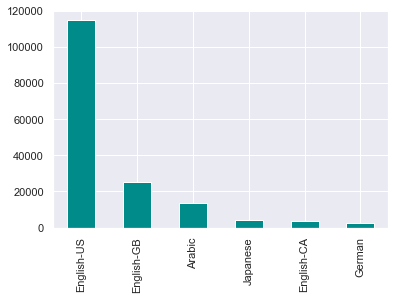

In [141]:
lang = data[["language_code"]]
lang.replace({'language_code': {'en-US': 'English-US', 'en-GB': 'English-GB', 'ara':'Arabic','jpn':'Japanese','en-CA':'English-CA','ger':"German"}},inplace=True)
lang['language_code'].value_counts().sort_values(ascending=False)[1:7].plot(kind="bar",color='darkcyan')

In [43]:
data['role1'].value_counts()[:9]

Writer                11886
Editor                 4174
Author/Illustrator     3704
Pseudonym              1266
Text                    901
Writer, Artist          892
Creator                 697
Adaptor                 573
Illustrator             551
Name: role1, dtype: int64

In [47]:
pd.set_option('display.max_columns', None)
data.head(3)

,Unnamed: 0,book_id,is_read,rating,read_at,user_id,asin,authors,country_code,edition_information,format,is_ebook,isbn,isbn13,language_code,num_pages,popular_shelves,publication_day,publication_month,publication_year,publisher,similar_books,title,title_without_series,work_id,author_id1,author_id2,author_id3,author_id4,role1,role2,role3,role4
0,0,24396144,False,0,NaN,8842281e1d1347389f2ab93d60773d4d,NaN,"[{'author_id': '12257290', 'role': 'Illustrato...",US,NaN,Hardcover,False,1780675631,9781780675633,eng,36.0,"[{'count': '66', 'name': 'to-read'}, {'count':...",1.0,9.0,2015.0,Laurence King Publishing,[],Pierre the Maze Detective: The Search for the ...,Pierre the Maze Detective: The Search for the ...,43980643,12257290,14730803.0,NaN,NaN,Illustrator,Writer,NaN,NaN
1,1,24396144,False,0,NaN,8e7e5b546a63cb9add8431ee6914cf59,NaN,"[{'author_id': '12257290', 'role': 'Illustrato...",US,NaN,Hardcover,False,1780675631,9781780675633,eng,36.0,"[{'count': '66', 'name': 'to-read'}, {'count':...",1.0,9.0,2015.0,Laurence King Publishing,[],Pierre the Maze Detective: The Search for the ...,Pierre the Maze Detective: The Search for the ...,43980643,12257290,14730803.0,NaN,NaN,Illustrator,Writer,NaN,NaN
2,2,24396144,False,0,NaN,6eb8463a35849a104556466e781c95dc,NaN,"[{'author_id': '12257290', 'role': 'Illustrato...",US,NaN,Hardcover,False,1780675631,9781780675633,eng,36.0,"[{'count': '66', 'name': 'to-read'}, {'count':...",1.0,9.0,2015.0,Laurence King Publishing,[],Pierre the Maze Detective: The Search for the ...,Pierre the Maze Detective: The Search for the ...,43980643,12257290,14730803.0,NaN,NaN,Illustrator,Writer,NaN,NaN


[Text(0, 0, 'Pantheon Books'),
 Text(0, 0, 'Houghton Mifflin'),
 Text(0, 0, 'Harcourt, Inc.'),
 Text(0, 0, 'Modern Library'),
 Text(0, 0, 'Dover Publications'),
 Text(0, 0, 'Harper Perennial Modern Classics'),
 Text(0, 0, 'City Lights'),
 Text(0, 0, 'Pantheon'),
 Text(0, 0, 'VIZ Media LLC'),
 Text(0, 0, 'Vertigo')]

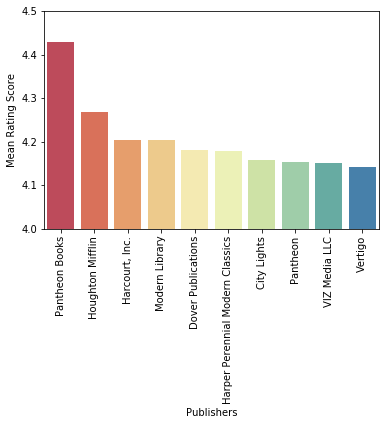

In [101]:
publisher_rate = data[['publisher', 'rating' ]]
mask = publisher_rate['rating']!=0 
publisher_rate_clean = publisher_rate[mask]
s_publisher = publisher_rate_clean.groupby('publisher')['rating'].count().sort_values(ascending = False)
mask = s_publisher >= 1000
s_pop_publisher = s_publisher[mask]
len(s_pop_publisher.index.values)
pop_publisher_name = s_pop_publisher.index.values
pop_publisher_name 
publisher_rate_clean.set_index('publisher')
publisher_index_rate = publisher_rate_clean.set_index('publisher')
len(publisher_index_rate.loc[pop_publisher_name]) # 154133 
pop_publisher_rating = publisher_index_rate.loc[pop_publisher_name]
pop_publisher_rating.reset_index(inplace=True)
pop_publisher_rating
pop_publisher_gp = pop_publisher_rating.groupby('publisher')['rating'].mean().sort_values(ascending = False)
pop_publisher_gp
pop_publisher_rate_df = pop_publisher_gp.reset_index()
most_pop_publisher_rate=pop_publisher_rate_df[:10]
most_pop_publisher_rate
pop_publisher_rate_plot = sns.barplot(x='publisher',y='rating', palette = 'Spectral',data=most_pop_publisher_rate)
pop_publisher_rate_plot.set(xlabel = 'Publishers',ylabel= 'Mean Rating Score')
pop_publisher_rate_plot.set(ylim=(4,4.5))
pop_publisher_rate_plot.set_xticklabels(pop_publisher_rate_plot.get_xticklabels(),rotation=90)

C:\Users\catym\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


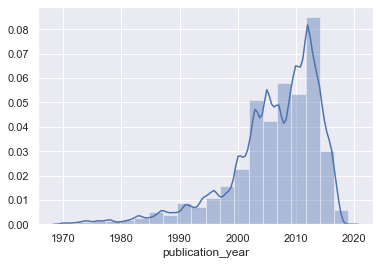

In [124]:
data['publication_year'].describe()
pub_yr_rating = data[['publication_year','rating']]
mask = pub_yr_rating['rating']!=0 
mask1 = pub_yr_rating['publication_year']!=0
mask2 = mask & mask1
mask3 = (pub_yr_rating['publication_year'] >= 1970) & (pub_yr_rating['publication_year'] <= 2019)
pub_yr_rating_clean = pub_yr_rating[mask2][mask3]


sns.set(color_codes=True)
pub_year = pub_yr_rating_clean['publication_year'].dropna()
sns.distplot(pub_year, bins =20)

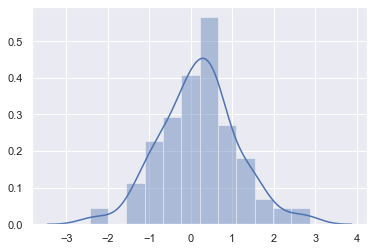

In [107]:
# sns.set(color_codes=True)
# x = np.random.normal(size=100)
# sns.distplot(x)

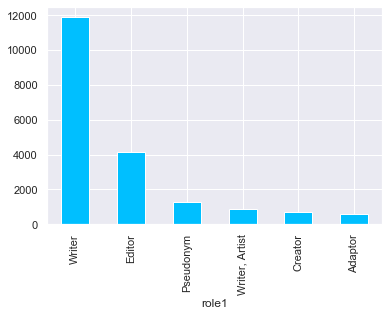

In [194]:
role1_rate_num = data.groupby("role1")['rating'].count().sort_values(ascending=False)
role1_rate_num_df = pd.DataFrame(role1_rate_num)
role1_rate_num1_df = role1_rate_num_df.reset_index()[:8].set_index('role1')
df = role1_rate_num1_df.drop(['Author/Illustrator','Text'])
df['rating'].plot(kind='bar', color='deepskyblue')

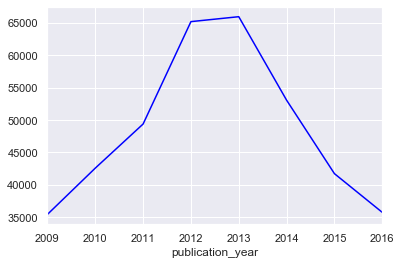

In [203]:
role1_rate_num = data.groupby("publication_year")['rating'].count().sort_values(ascending=False)
role1_rate_num_df = pd.DataFrame(role1_rate_num)
role1_rate_num1_df = role1_rate_num_df.reset_index()[:8].set_index('publication_year')
role1_rate_num1_df.reset_index().sort_values(by='publication_year').set_index('publication_year')['rating'].plot(color="blue")